Задача 7


In [3]:
# encoding: utf-8
%matplotlib inline

from scipy.stats import uniform
import matplotlib.pyplot as plt

def generate(theta, N):
    return uniform.rvs(scale=theta, size=N)

def estimate(samples, theta, estimator):
    N, M = len(samples[0]), len(samples)

    # Создаем список для накопления средних значений по выборкам
    result = [0 for j in range(N)]

    for i in range(M):
        errors = []
        mean = minimum = maximum = samples[i][0]
        for j, sample in enumerate(samples[i]):
            mean = (j * mean + sample) / (j + 1)
            minimum = min(minimum, sample)
            maximum = max(maximum, sample)

            # Считаем квадратичную функцию потерь
            error = (theta - estimator(mean, j + 1, minimum, maximum)) ** 2
            errors.append(error)

            # Накапливаем средние значения по выборкам
            result[j] = (i * result[j] + error) / (i + 1)

    return result

def draw(M, N, theta, margin):
    # Формируем выборки
    samples = [] 
    for i in range(M):    
        samples.append(generate(theta, N))

    # Строим графики    
    plt.figure(figsize=(15,10))
    plt.axis([0, N, 0, margin * theta])

    plt.plot(range(N),
        estimate(samples, theta, lambda mean, l, mini, maxi: 2 * mean),
        label='2 * E')
    plt.plot(range(N),
        estimate(samples, theta, lambda mean, l, mini, maxi: (l + 1) * mini),
        label='(l + 1) * X_(1)')
    plt.plot(range(N),
        estimate(samples, theta, lambda mean, l, mini, maxi: mini + maxi),
        label='X_(1) + X_(n)')
    plt.plot(range(N),
        estimate(samples, theta, lambda mean, l, mini, maxi: 
                                                    float(l + 1) / l * maxi),
        label='(l + 1) / l * X_(n)')
    plt.legend()
    plt.show()



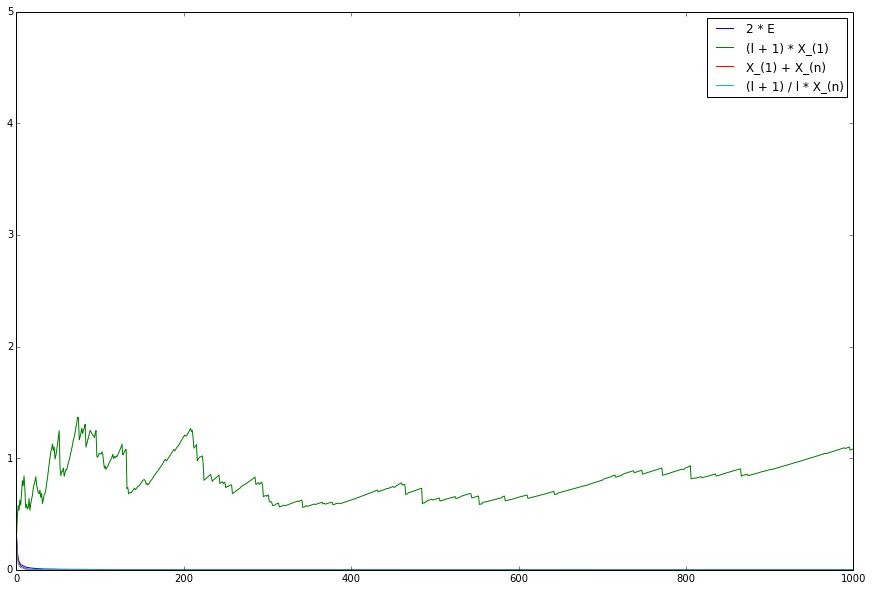

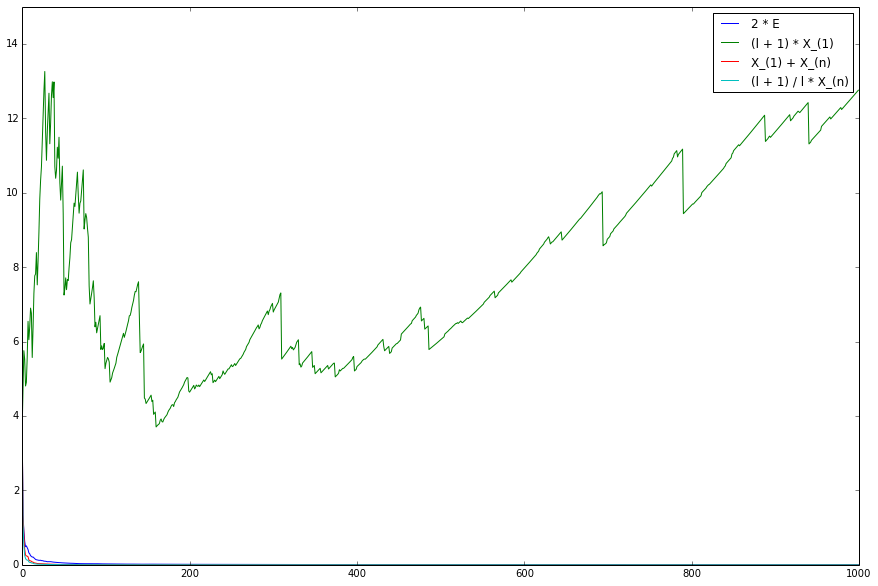

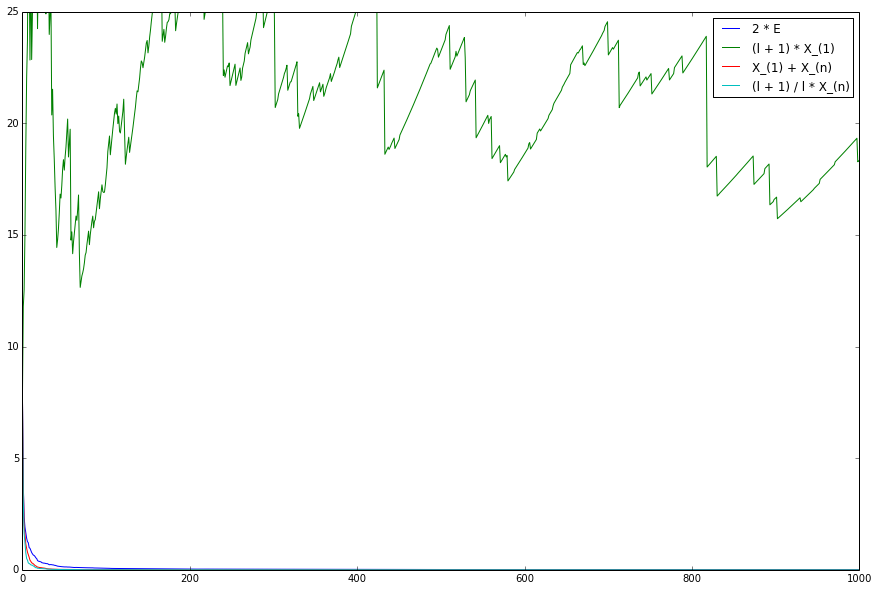

In [4]:
draw(100, 1000, 1, 5.0)
draw(100, 1000, 3, 5.0)
draw(100, 1000, 5, 5.0)

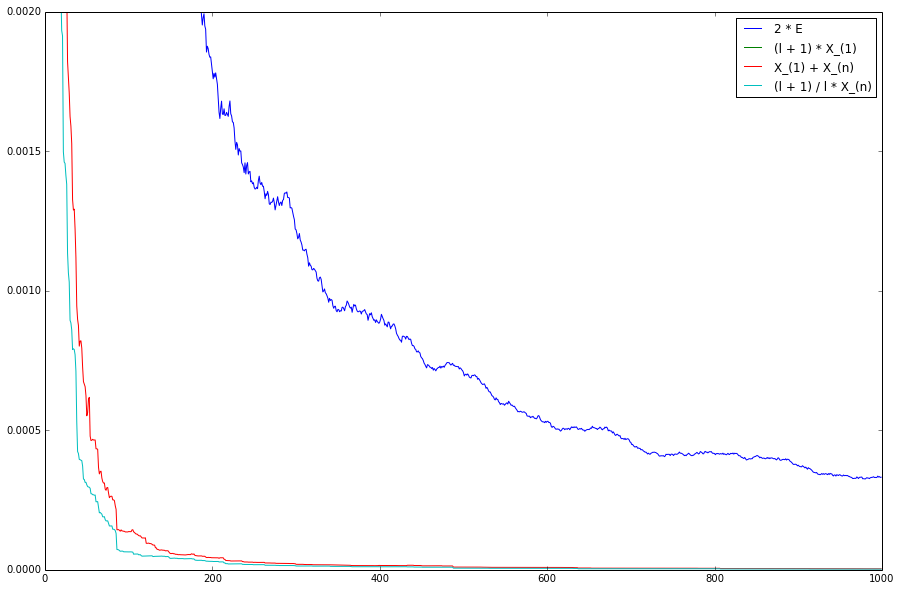

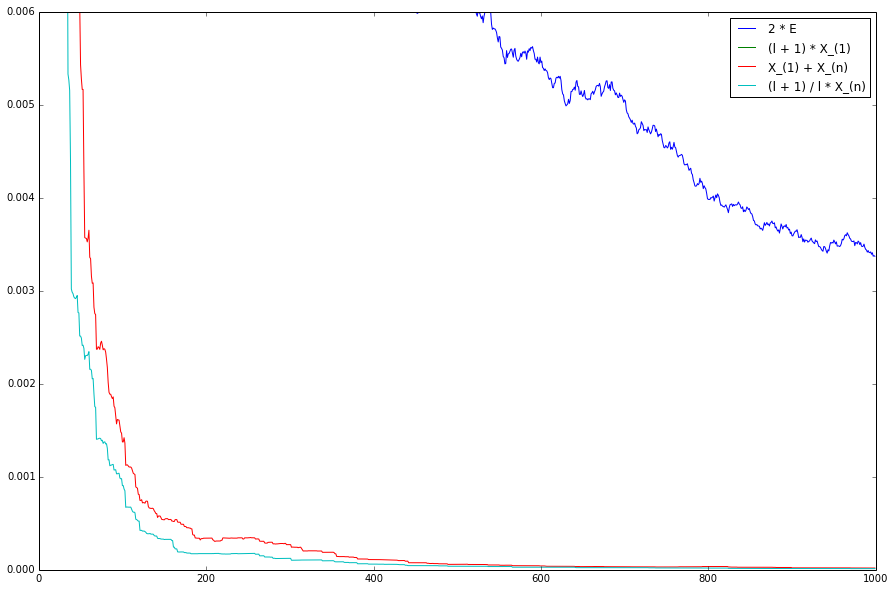

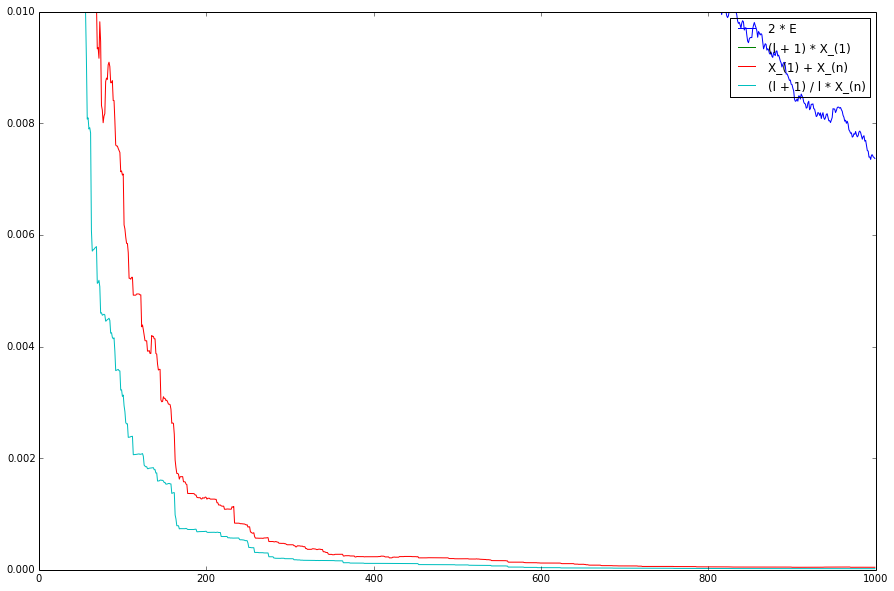

In [6]:
draw(100, 1000, 1, 0.002)
draw(100, 1000, 3, 0.002)
draw(100, 1000, 5, 0.002)